## Importing Necessary Libraries...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Creating a Random Dataframe of Ten Variables...

In [33]:
x1 = 0.7 * np.random.rand(100)
x2 = 1.5*x1 + (np.random.rand(100)/3)
x3 = (2.3*x1 + (np.random.rand(100)/5) + 0.05*x2)
x4 = 4.5*x3 + np.random.rand(100)
x5 = x4 + (np.random.rand(100)/4)
x6 = 4*x3 + 0.4*x5 + np.random.rand(100)
x7 = 4 * np.random.rand(100)
x8 = 0.4 * np.random.rand(100)
x9 = 3 * np.random.rand(100)
x10 = 4.5 * np.random.rand(100)

training_data = pd.DataFrame(data={"X1": x1, "X2": x2 , "X3" : x3 , "X4" : x4 , "X5" : x5,"X6" : x6,"X7" : x7,"X8" : x8,"X9" : x9,"X10" : x10})
training_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,0.570154,0.881761,1.389038,6.753922,6.895276,8.802757,0.461243,0.288518,1.579792,1.472436
1,0.526552,0.982581,1.433118,6.493343,6.656092,9.166633,3.205461,0.179111,2.446797,1.132912
2,0.189691,0.312334,0.586531,3.609183,3.819501,3.981043,3.240939,0.066412,0.053758,3.148895
3,0.391318,0.682116,1.004251,5.469986,5.716442,7.191403,0.090439,0.067434,1.046713,1.417580
4,0.299984,0.478219,0.832027,4.410921,4.490968,5.127739,1.645579,0.261339,2.905574,0.192018


## 3D Scatter Plot of the Dataframe.

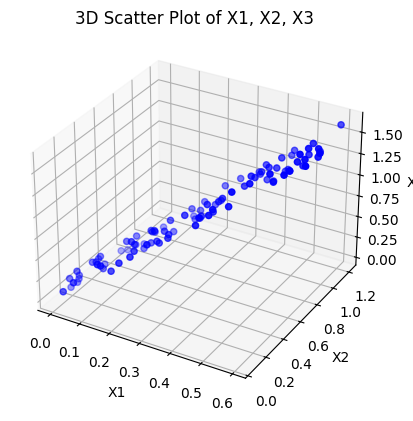

In [4]:
# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(training_data['X1'], training_data['X2'], training_data['X3'], color='b', marker='o')

# Labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Show plot
plt.title("3D Scatter Plot of X1, X2, X3")
plt.show()

### To apply PCA on this Dataframe, We have to calculate its Covariance matrix $\Sigma$ which is done by:


\[
\begin{aligned}
\Sigma &= \frac{1}{N_{\text{train}}} (\bar{X} \bar{X}^T) \\
N_{\text{train}} &= 100 \\
\bar{X} &= \text{mean-centered data}
\end{aligned}
\]


In [5]:
X_transpose = np.array(training_data)
X_bar_transpose = X_transpose - np.mean(X_transpose,axis=0)
X_bar = X_bar_transpose.T
N_train = training_data.shape[0]

In [6]:
sigma = (1/N_train) * np.matmul(X_bar,X_bar_transpose)

In [7]:
sigma

array([[ 3.04175756e-02,  4.53103545e-02,  7.24279923e-02,
         3.25029635e-01,  3.26691200e-01,  4.22512708e-01,
         2.80296587e-02, -3.68140474e-03, -2.14239176e-02,
         7.62006032e-03],
       [ 4.53103545e-02,  7.64075467e-02,  1.09201220e-01,
         4.88541641e-01,  4.90929403e-01,  6.35000577e-01,
         4.15071145e-02, -5.05931980e-03, -2.05528816e-02,
        -2.03178059e-02],
       [ 7.24279923e-02,  1.09201220e-01,  1.76173433e-01,
         7.90676823e-01,  7.94979949e-01,  1.02776953e+00,
         7.71844860e-02, -9.12009984e-03, -4.12620381e-02,
         2.03318548e-02],
       [ 3.25029635e-01,  4.88541641e-01,  7.90676823e-01,
         3.62783216e+00,  3.64525137e+00,  4.64624651e+00,
         3.32852969e-01, -4.24792056e-02, -1.83950718e-01,
         9.31517743e-02],
       [ 3.26691200e-01,  4.90929403e-01,  7.94979949e-01,
         3.64525137e+00,  3.66879977e+00,  4.67274238e+00,
         3.49419547e-01, -4.33249721e-02, -1.81538970e-01,
         7.

### Now we want to Project our $\bar{X}^T$ data of Shape $(N_{\text{train}} , p)$ where $p$ is the number of input variables in the Dataframe (i.e $p = 10$) into a vector space (having orthogonal basis vectors $\vec{q_1},\vec{q_2},\vec{q_3} .. \vec{q_p}$) that the cov matrix of the projected data will be the Matrix $D$

### Let $Q$ (of shape  $p \times p$) be the matrix that contains the all the orthogonal basis vectors so the projected data will be given by $Q \bar{X}$ and $D$ is defined by:

\[
\begin{aligned}
D = \frac{1}{N_{\text{train}}} (Q \bar{X}) (Q \bar{X})^T \\
\end{aligned}
\]

By reducing:
\[
\begin{aligned}
\Sigma = Q^T \Lambda  Q \\
\end{aligned}
\]
where $\lambda$ is $D$

In [ ]:
factorized_sigma = np.linalg.svd(sigma) 
factorized_sigma


In [9]:
Q_transpose = factorized_sigma[0]
Q = Q_transpose.T
Z = np.matmul(Q,X_bar)


In [10]:
New_data = pd.DataFrame(data = Z.T,columns=["Z1","Z2","Z3","Z4","Z5","Z6","Z7","Z8","Z9","Z10"])
New_data

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10
0,-5.621842,-1.843118,-0.894943,1.061257,-0.126134,-0.032422,-0.125663,-0.082965,-0.028644,-0.029925
1,1.632574,1.596739,-2.331874,-0.635899,-0.397386,-0.029627,-0.095234,0.020672,0.050268,0.027173
2,-0.561136,1.431492,1.006976,0.771734,-0.140459,0.083486,0.063546,0.008699,-0.009382,-0.002674
3,0.951302,1.316753,-1.130968,0.238870,0.077086,0.199122,0.026914,-0.050724,-0.108643,-0.024410
4,0.419182,-1.835445,-0.573144,-0.397808,-0.601972,0.097542,0.023336,0.048202,0.005963,-0.026067
...,...,...,...,...,...,...,...,...,...,...
95,-7.216665,-1.108096,1.119633,-1.473474,0.257457,0.150439,0.025815,-0.056331,-0.073606,0.015040
96,-4.447300,1.122855,0.795043,1.026281,-0.399496,-0.162847,-0.045374,0.056658,0.040779,-0.016596
97,-5.008062,1.037443,-1.158698,-0.397370,0.254468,0.193141,-0.093289,-0.025795,0.045778,-0.031726
98,-0.062824,-1.971494,-0.942999,1.177638,-0.215150,0.064163,0.016090,-0.116178,0.025033,-0.012153


In [40]:
eigen_values = factorized_sigma[1]
total = np.sum(eigen_values)

var_sum = 0
pvp = 0.9997

for i in range(eigen_values.shape[0]):
    if (var_sum/total) > pvp:
        break
    var_sum += eigen_values[i]
    val = i

projected_final = New_data.iloc[:,0:(val-1)]
projected_final


,Z1,Z2,Z3,Z4,Z5,Z6
0,-5.621842,-1.843118,-0.894943,1.061257,-0.126134,-0.032422
1,1.632574,1.596739,-2.331874,-0.635899,-0.397386,-0.029627
2,-0.561136,1.431492,1.006976,0.771734,-0.140459,0.083486
3,0.951302,1.316753,-1.130968,0.238870,0.077086,0.199122
4,0.419182,-1.835445,-0.573144,-0.397808,-0.601972,0.097542
...,...,...,...,...,...,...
95,-7.216665,-1.108096,1.119633,-1.473474,0.257457,0.150439
96,-4.447300,1.122855,0.795043,1.026281,-0.399496,-0.162847
97,-5.008062,1.037443,-1.158698,-0.397370,0.254468,0.193141
98,-0.062824,-1.971494,-0.942999,1.177638,-0.215150,0.064163


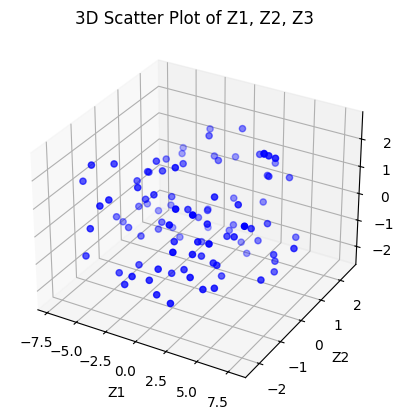

In [22]:
# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(projected_final['Z1'], projected_final['Z2'], projected_final['Z3'], color='b', marker='o')

# Labels
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.set_zlabel('Z3')

# Show plot
plt.title("3D Scatter Plot of Z1, Z2, Z3")
plt.show()